In [1]:
from textblob import TextBlob
import numpy as np
import pandas as pd
import nltk
pd.options.display.max_columns = None
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import set_config
from sklearn.base import clone
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from feature_engine.preprocessing import MatchVariables
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder, OneHotEncoder
from feature_engine.imputation import (
    AddMissingIndicator, MeanMedianImputer, CategoricalImputer, EndTailImputer
)
from feature_engine.transformation import PowerTransformer
from feature_engine.creation import RelativeFeatures
from feature_engine.selection import DropFeatures
plt.style.use('ggplot')
train = pd.read_csv('/Users/manu/Analisis Predictivo/Final/train.csv')
val = pd.read_csv('/Users/manu/Analisis Predictivo/Final/val.csv')
valpred = pd.read_csv('/Users/manu/Analisis Predictivo/Final/valpred.csv')

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = train.drop('retention', axis=1)
y = train['retention']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141102)

# Definir los hiperparámetros
params = {
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': 10,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 166,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False
}

# Crear el modelo Random Forest
model = RandomForestClassifier(**params)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC (AUC-ROC)
probabilities = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)
print("AUC-ROC:", auc_roc)


Accuracy: 0.9229897087039944
F1-Score: 0.9596324403401298
Precision: 0.924510019819423
Recall: 0.997528869457777
AUC-ROC: 0.736789779842012


In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir la base de datos val en variables predictoras (X_val) y variable objetivo (y_val)
X_val = val

# Utilizar el modelo entrenado para predecir los valores de 'retention' en la base de datos val
y_pred = model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['retention'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['Unnamed: 0'], y_pred_df], axis=1)

# Imprimir el resultado
submission['retention'].value_counts()

1.0    28390
0.0      276
Name: retention, dtype: int64

In [6]:
# Calcular las métricas de desempeño utilizando las predicciones y los valores reales
accuracy = accuracy_score(submission['retention'], valpred['retention'])
precision = precision_score(submission['retention'], valpred['retention'])
recall = recall_score(submission['retention'], valpred['retention'])
f1 = f1_score(submission['retention'], valpred['retention'])
auc_roc = roc_auc_score(submission['retention'], valpred['retention'])

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9250680248377869
Precision: 0.9983289023927079
Recall: 0.9258893976752378
F1-Score: 0.9607456140350876
AUC-ROC: 0.8832345539100827


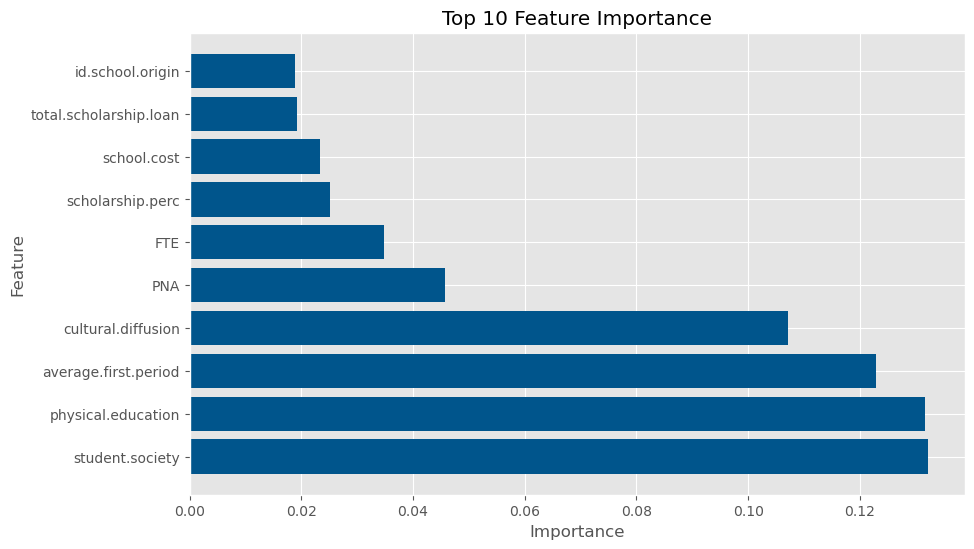

In [8]:
# Obtener la importancia de las características
importance = model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con la importancia y los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Ordenar las características por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='#00558c')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

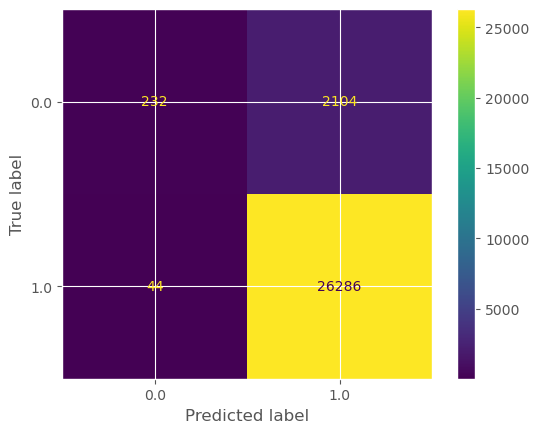

In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score

ConfusionMatrixDisplay.from_predictions(valpred['retention'], submission['retention'])

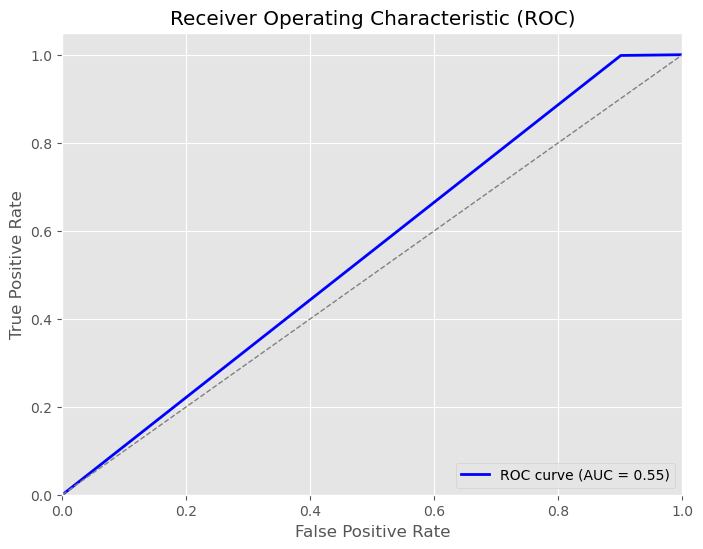

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC-ROC
fpr, tpr, thresholds = roc_curve(valpred['retention'], submission['retention'])
auc_roc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## Muestreo Estratificado

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from skopt import BayesSearchCV

# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = train.drop('retention', axis=1)
y = train['retention']

# Definir los rangos de los hiperparámetros a ajustar
param_space = {
    'n_estimators': (100, 1000),
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
}

# Crear el modelo de Bosque Aleatorio (Random Forest)
model = RandomForestClassifier()

# Realizar la búsqueda bayesiana de hiperparámetros
bayes_search = BayesSearchCV(
    model,
    param_space,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=141102)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros ajustados
best_model = bayes_search.best_estimator_

# Predecir la variable objetivo para los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC (AUC-ROC)
probabilities = best_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)
print("AUC-ROC:", auc_roc)


/Users/manu/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/manu/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Accuracy: 0.9252572824001395
F1-Score: 0.9608711533193316
Precision: 0.9257467118286192
Recall: 0.9987660765981681
AUC-ROC: 0.7366931245556494


In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir la base de datos val en variables predictoras (X_val) y variable objetivo (y_val)
X_val = val

# Utilizar el modelo entrenado para predecir los valores de 'retention' en la base de datos val
y_pred = best_model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['retention'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['Unnamed: 0'], y_pred_df], axis=1)

# Imprimir el resultado
submission['retention'].value_counts()

1.0    28396
0.0      270
Name: retention, dtype: int64

In [25]:
# Calcular las métricas de desempeño utilizando las predicciones y los valores reales
accuracy = accuracy_score(submission['retention'], valpred['retention'])
precision = precision_score(submission['retention'], valpred['retention'])
recall = recall_score(submission['retention'], valpred['retention'])
f1 = f1_score(submission['retention'], valpred['retention'])
auc_roc = roc_auc_score(submission['retention'], valpred['retention'])

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9247889485801996
Precision: 0.9982909229016331
Recall: 0.9256585434568249
F1-Score: 0.9606037349705807
AUC-ROC: 0.879495938395079


In [26]:
df = pd.read_excel('/Users/manu/Analisis Predictivo/Final/2022-03-16 dataset on student dropout .xlsx')
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Obtener las columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Calcular la correlación de Cramer's V entre todas las columnas categóricas
for col1 in categorical_cols:
        if col1 != 'retention':
            correlation = cramers_v(df[col1], df['retention'])
            print(f"Cramer's V correlation between {col1} and retention: {correlation}")


Cramer's V correlation between generation and retention: 0.02593860739846131
Cramer's V correlation between level and retention: 0.02639986988238043
Cramer's V correlation between gender and retention: 0.012296088153849912
Cramer's V correlation between max.degree.parents and retention: 0.0794213829509962
Cramer's V correlation between father.education.complete and retention: 0.07649117325604864
Cramer's V correlation between father.education.summary and retention: 0.07601948372223484
Cramer's V correlation between mother.education.complete and retention: 0.07581956584941359
Cramer's V correlation between mother.education.summary and retention: 0.07426729142879385
Cramer's V correlation between parents.exatec and retention: 0.07864540379499366
Cramer's V correlation between father.exatec and retention: 0.07379621037124894
Cramer's V correlation between mother.exatec and retention: 0.07353034527637337
Cramer's V correlation between tec.no.tec and retention: 0.014494978884522518
Cramer's

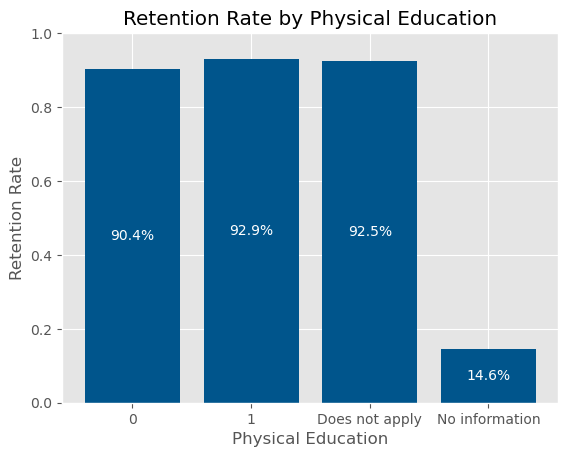

In [30]:
import matplotlib.pyplot as plt

# Agrupar los datos por generación y calcular la retención media
generation_retention = df.groupby('physical.education')['retention'].mean()

# Obtener los nombres de las generaciones y sus posiciones en el eje x
generation_names = generation_retention.index
x_pos = range(len(generation_names))

# Crear el gráfico de barras
bars = plt.bar(x_pos, generation_retention, color='#00558c')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Physical Education')
plt.ylabel('Retention Rate')
plt.title('Retention Rate by Physical Education')

# Establecer los límites del eje y en el rango de 0 a 1
plt.ylim(0, 1)

# Personalizar el eje x con los nombres de las generaciones
plt.xticks(x_pos, generation_names)

# Agregar los valores de retención como porcentaje dentro de las barras en letra blanca
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1%}', ha='center', va='center', color='white')

# Mostrar el gráfico
plt.show()

In [32]:
df['physical.education'].value_counts()

Does not apply    64611
1                 58701
0                 19124
No information      890
Name: physical.education, dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear el clasificador RUSBoost con Random Forest como base_estimator
rus_boost = RUSBoostClassifier(base_estimator=rf, n_estimators=10, random_state=42)

# Entrenar el clasificador
rus_boost.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = rus_boost.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/Users/manu/opt/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_weight_boosting.py:267: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Accuracy: 0.7092708878423164
